In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.integrate as integrate
import scipy.signal as signal
import scipy.fft as fft

In [17]:
def f(x: np.ndarray):
    out = np.abs(np.sin(1.5 * x * np.pi + np.pi / 2))
    # out = out * np.exp(-x)
    out = np.ones(len(x))
    mask = np.where(np.abs(x) > 1)
    if len(mask) > 0:
        out[mask] = 0
    return out

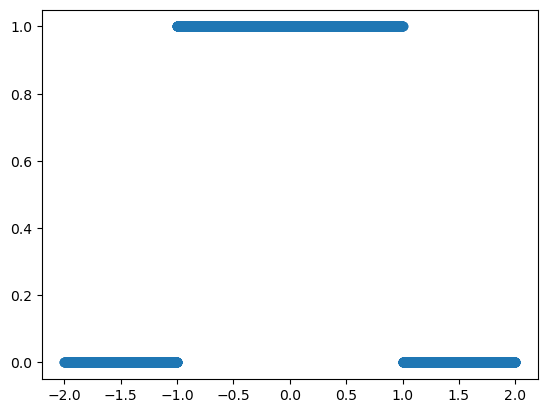

In [18]:
x_vals = np.linspace(-2, 2, 10_000)
y_vals = f(x_vals)

plt.scatter(x_vals, y_vals)
plt.show()

In [19]:
def conv_n_times(x: np.ndarray, n: int):
    out = x
    for _ in range(n):
        of: np.ndarray = signal.fftconvolve(out, x)
        mask = np.zeros(len(of), dtype=np.bool8)
        m1 = np.repeat([[False, True]], len(of) // 2, axis=0).flatten()
        mask[0 : len(m1)] = m1
        mask[len(m1) : len(of)] = False
        out = of[mask] / of.max()
    return out

In [20]:
o = conv_n_times(y_vals, 10)

In [21]:
len(o)

9999

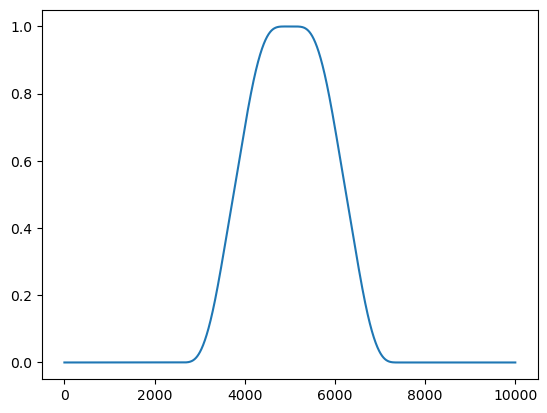

In [26]:
two_sum = conv_n_times(y_vals, 100)

plt.plot(two_sum)
plt.show()